In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import Category10, Category20, Category20b, Category20c
import warnings
warnings.filterwarnings('ignore')

In [60]:
yum_ingr = pd.read_pickle('yummly_ingr.pkl')
yum_ingrX = pd.read_pickle('yummly_ingrX.pkl')
yum_ingr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6242 entries, 0 to 8663
Columns: 361 entries, Unnamed: 0 to zucchini
dtypes: bool(349), float64(1), int64(4), object(7)
memory usage: 2.7+ MB


In [61]:
yum_ingrX.shape

(6242, 349)

In [62]:
(yum_ingr.columns)


Index(['Unnamed: 0', 'id', 'recipeName', 'rating', 'totalTimeInSeconds',
       'course', 'cuisine', 'ingredients', 'clean ingredients', 'len_diff',
       ...
       'white wine', 'whitefish', 'whole grain wheat flour', 'wild rice',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=361)

In [63]:
yum_ingr['cuisine'].unique()

array(['Southern & Soul Food', 'American', 'Cuban', 'Chinese', 'Asian',
       'Japanese', 'Thai', 'Indian', 'Barbecue', 'Hawaiian', 'Mexican',
       'Mediterranean', 'Italian', 'Cajun & Creole', 'English', 'Irish',
       'French', 'German', 'Greek', 'Hungarian', 'Southwestern',
       'Moroccan', 'Portuguese', 'Spanish', 'Swedish'], dtype=object)

In [64]:
cuisine_list = yum_ingr['cuisine']
list_uq=[]
for i in cuisine_list:
    if i not in list_uq:
        list_uq.append(i)
        
print(len(list_uq))

25


In [65]:
#take some regional cuisines, tsne clustering, and plotting
def tsne_cluster_cuisine(df,sublist):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed').fit_transform(dist)

    palette = sns.color_palette("hls", len(sublist))
    plt.figure(figsize=(10,10))
    for i,cuisine in enumerate(sublist):
        plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\
        tsne[lenlist[i]:lenlist[i+1],1],c=palette[i],label=sublist[i])
    plt.legend()


In [66]:
#interactive plot with boken; set up for four categories, with color palette; pass in df for either ingredient or flavor
from bokeh.palettes import Category10, Category20, Category20b, Category20c
def plot_bokeh(df,sublist,filename):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed').fit_transform(dist)
    #cannot use seaborn palette for bokeh
    #palette =['red','green','blue','yellow']
    palette1 = list(Category10[10])
    palette2 = list(Category20b[10])
    palette3 = list(Category20c[5])
    colors =[]
    colors.extend(list(palette1))
    colors.extend(list(palette2))
    colors.extend(list(palette3))
    fillcolors=[]
    for i in range(len(sublist)):
        for j in range(lenlist[i+1]-lenlist[i]):
            fillcolors.append(colors[i])
    #plot with boken
    output_file(filename)
    source = ColumnDataSource(
            data=dict(x=tsne[:,0],y=tsne[:,1],
                cuisine = df_sub['cuisine'],
                recipe = df_sub['recipeName']))

    hover = HoverTool(tooltips=[
                ("cuisine", "@cuisine"),
                ("recipe", "@recipe")])

    p = figure(plot_width=1000, plot_height=1000, tools=[hover],
               title="flavor clustering")


    p.circle(x=tsne[:,0], y=tsne[:,1], size=10, fill_color=fillcolors)

    show(p)

### Plots for all cuisines 

(6242, 349) [0, 204, 644, 854, 1044, 1555, 1907, 2357, 2645, 2821, 2959, 3210, 3395, 3779, 4105, 4122, 4309, 4515, 4703, 5073, 5365, 5467, 5643, 5835, 6149, 6242]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

(6242, 349) [0, 204, 644, 854, 1044, 1555, 1907, 2357, 2645, 2821, 2959, 3210, 3395, 3779, 4105, 4122, 4309, 4515, 4703, 5073, 5365, 5467, 5643, 5835, 6149, 6242]


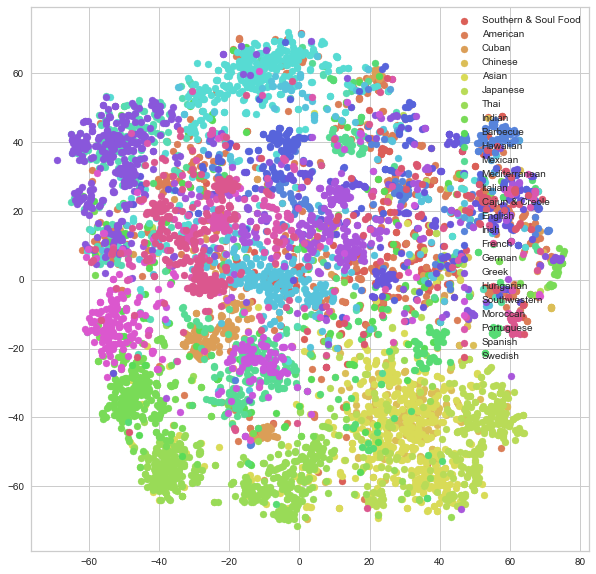

In [67]:
yum_ingr = pd.read_pickle('yummly_ingr.pkl')
yum_ingrX = pd.read_pickle('yummly_ingrX.pkl')


#select four cuisines and plot tsne clustering with ingredients
sublist = ['Southern & Soul Food','American','Cuban','Chinese','Asian',
            'Japanese','Thai','Indian','Barbecue','Hawaiian','Mexican',
       'Mediterranean','Italian','Cajun & Creole','English','Irish',
       'French','German','Greek','Hungarian','Southwestern',
       'Moroccan','Portuguese','Spanish','Swedish']

#sublist = ['Italian','French','Japanese','Indian']
df_ingr = yum_ingrX.copy()
df_ingr['cuisine'] = yum_ingr['cuisine']
df_ingr['recipeName'] = yum_ingr['recipeName']
tsne_cluster_cuisine(df_ingr,sublist)



#select four cuisines and do interactive plotting with bokeh
plot_bokeh(df_ingr,sublist, 'test2.html')

### 3b) Optimal clustering 

In [68]:
df_ingr.columns

Index(['almond', 'anise', 'anise seed', 'apple', 'apple juice', 'apricot',
       'artichoke', 'asparagus', 'avocado', 'bacon',
       ...
       'whole grain wheat flour', 'wild rice', 'wine', 'wood', 'yam', 'yeast',
       'yogurt', 'zucchini', 'cuisine', 'recipeName'],
      dtype='object', length=351)

In [69]:
df_ingr.head()

,almond,anise,anise seed,apple,apple juice,apricot,artichoke,asparagus,avocado,bacon,...,whole grain wheat flour,wild rice,wine,wood,yam,yeast,yogurt,zucchini,cuisine,recipeName
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,Southern & Soul Food,Southern Cornbread Dressing
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,American,Disappearing Buffalo Chicken Dip
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,Southern & Soul Food,Classic Coleslaw
12,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,American,Creamed Spinach
13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,American,Eggs in Hash Brown Nests


In [70]:
df_ingr.shape

(6242, 351)

In [71]:
df_ingr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6242 entries, 0 to 8663
Columns: 351 entries, almond to recipeName
dtypes: bool(349), object(2)
memory usage: 2.2+ MB


2 columns are object type -> cuisine and recipeName
recipeName is target, so no need to convert
cuisine column should be converted from object type to int

In [72]:
df_ingr['cuisine'].value_counts()

Asian                   511
Thai                    450
American                440
Italian                 384
Greek                   370
Japanese                352
Cajun & Creole          326
Spanish                 314
Hungarian               292
Indian                  288
Mexican                 251
Cuban                   210
French                  206
Southern & Soul Food    204
Portuguese              192
Chinese                 190
German                  188
Irish                   187
Mediterranean           185
Moroccan                176
Barbecue                176
Hawaiian                138
Southwestern            102
Swedish                  93
English                  17
Name: cuisine, dtype: int64

In [73]:
dfk = df_ingr.copy()
dfk['cuisine'].unique()

array(['Southern & Soul Food', 'American', 'Cuban', 'Chinese', 'Asian',
       'Japanese', 'Thai', 'Indian', 'Barbecue', 'Hawaiian', 'Mexican',
       'Mediterranean', 'Italian', 'Cajun & Creole', 'English', 'Irish',
       'French', 'German', 'Greek', 'Hungarian', 'Southwestern',
       'Moroccan', 'Portuguese', 'Spanish', 'Swedish'], dtype=object)

In [74]:
dfk = dfk.replace({'cuisine': {'Southern & Soul Food': 1, 'American': 2, 'Cuban':3, 
                                'Chinese':4, 'Asian':5, 'Japanese':6, 'Thai':7,
                                'Indian':8, 'Barbecue':9, 'Hawaiian':10, 'Mexican':11,
                                'Mediterranean':12, 'Italian':13, 'Cajun & Creole':14,
                                'English':15, 'Irish':16,'French':17, 'German':18, 
                                 'Greek':19, 'Hungarian':20, 'Southwestern':21,
                               'Moroccan':22, 'Portuguese':23, 'Spanish':24, 'Swedish':25}}) 

##### Optimal clustering by taking recipeName as target column

In [75]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

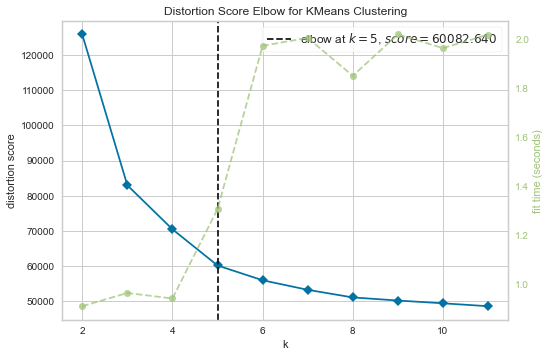

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
df1 = dfk.copy()

# data not scaled
Y = df1['recipeName']
X = df1.drop('recipeName',1)

#elbow method 
model_elb = KMeans()
visualizer_elbow = KElbowVisualizer(model_elb, k=(2,12))
visualizer_elbow.fit(X)       
visualizer_elbow.show()   


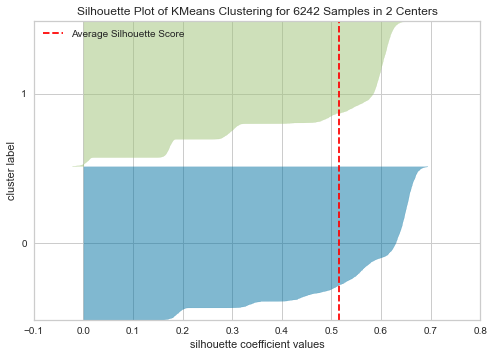

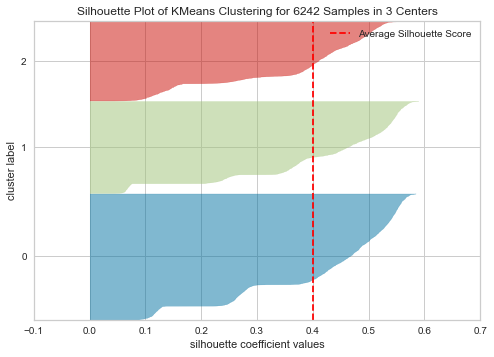

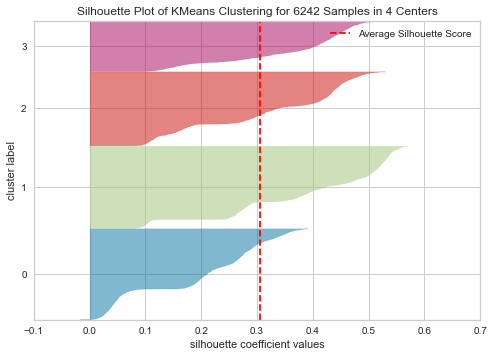

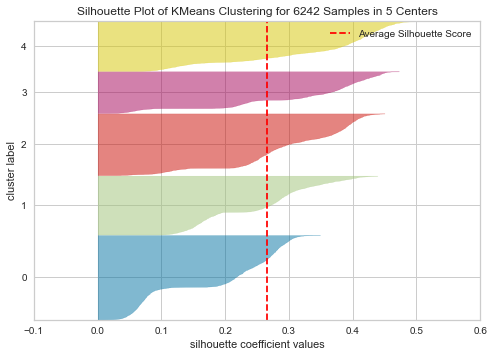

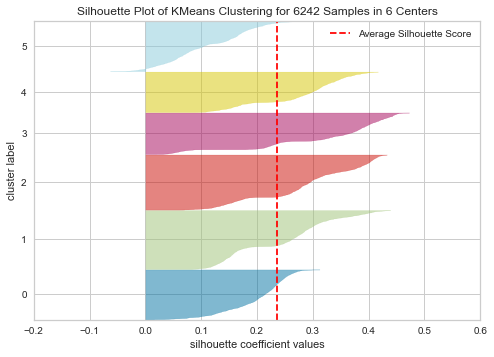

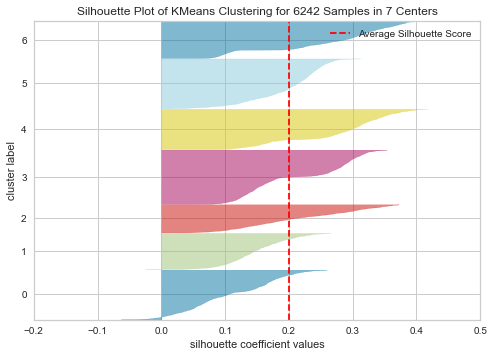

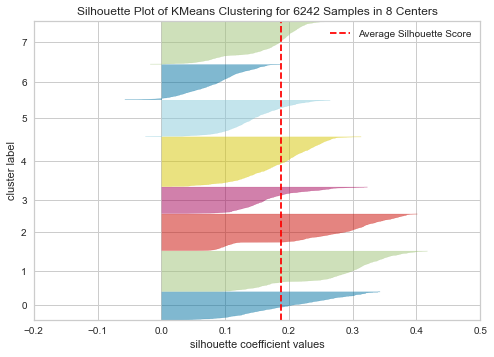

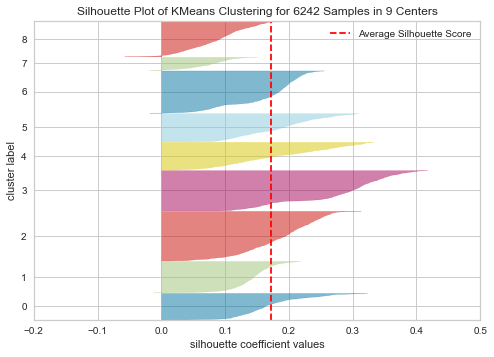

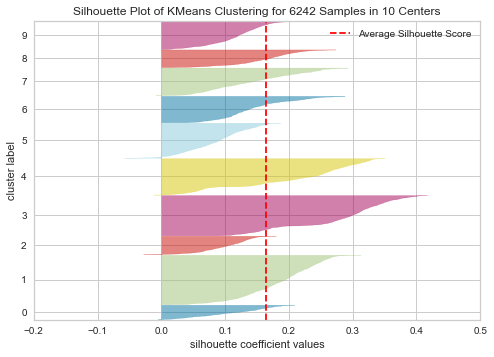

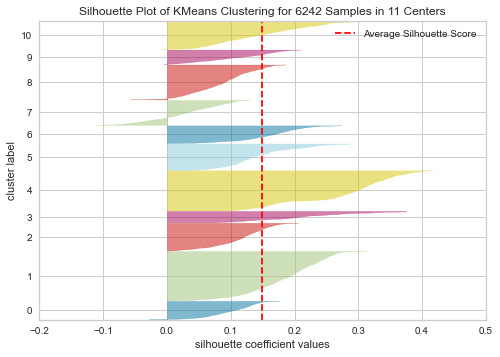

In [77]:
#silhouette method 
for i in range(2,12):
    model_sil = KMeans(i, random_state=42)
    visualizer_silhoutte = SilhouetteVisualizer(model_sil, colors='yellowbrick')
    visualizer_silhoutte.fit(X)        
    visualizer_silhoutte.show() 

##### Optimal clustering by taking cuisine as target column

In [78]:
dfk['recipeName'].value_counts()

Irish Soda Bread                                                                                             35
Hungarian Goulash                                                                                            24
French Onion Soup                                                                                            22
Chicken Paprikash                                                                                            19
Chicken Teriyaki                                                                                             11
                                                                                                             ..
Greek Chicken                                                                                                 1
Chourico Stew                                                                                                 1
Easy Italian Pasta Bake                                                                                 

In [79]:
#one hot encoding to convert recipeNmae column from object type
df2 = pd.get_dummies(dfk, columns = ['recipeName'])
df2.head(5)


,almond,anise,anise seed,apple,apple juice,apricot,artichoke,asparagus,avocado,bacon,...,"recipeName_[In The Kitchen] Cajun Jambalaya Pasta With Shrimp, Chicken, And Sausage",recipeName_a Classic Italian Pasta,recipeName_baked French fruit crepe,recipeName_no bean Hawaiian chili,"recipeName_the Best Ever Potato Pancakes, with a Twist (Irish Potato Pancakes)",recipeName_{Crock Pot} French Onion Soup,recipeName_{Easy Dinner Recipe} Greek Chicken Bake,recipeName_{Easy Dinner Recipe} Italian Chicken Bake,recipeName_âCandy Cornâ Chicken Quesadillas,"recipeName_ï»¿Skinny, Greek-Style Vegetarian Pizza, Ready in 10 Minutes!"
0,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
12,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
13,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y_new = df2['cuisine']
x_new = df2.drop('cuisine',1)

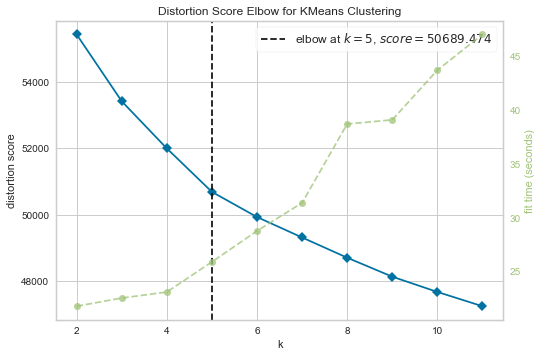

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
#elbow method
model_elb2 = KMeans()
visualizer_elbow = KElbowVisualizer(model_elb2, k=(2,12))
visualizer_elbow.fit(x_new)       
visualizer_elbow.show() 


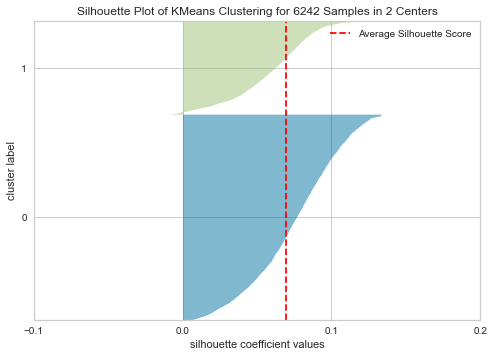

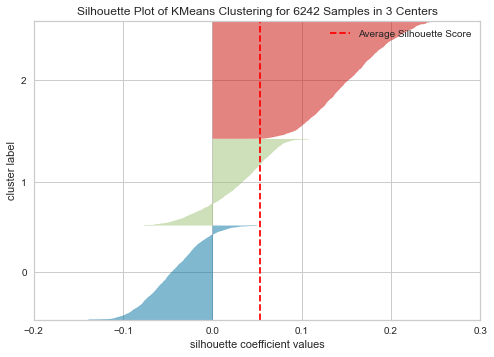

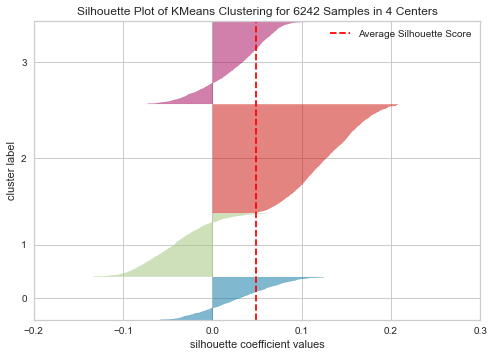

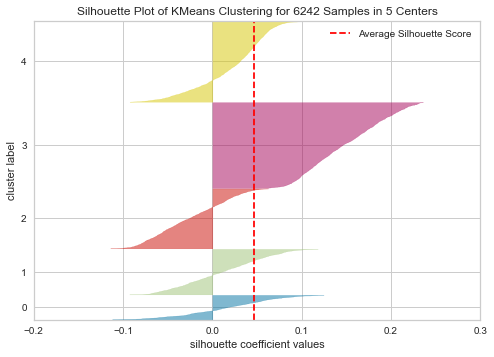

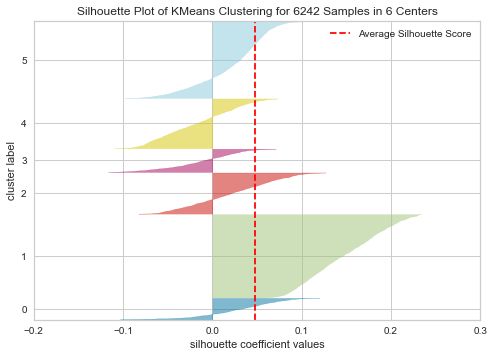

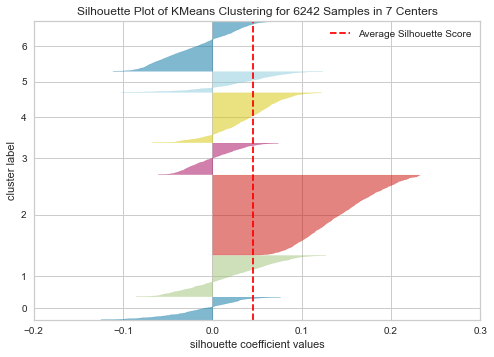

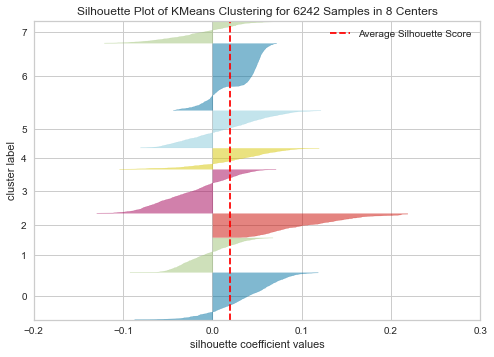

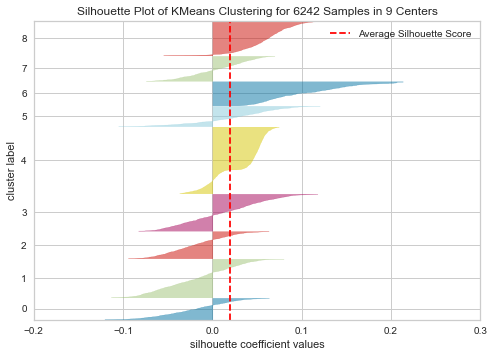

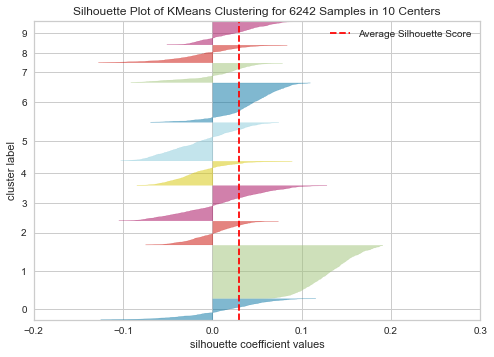

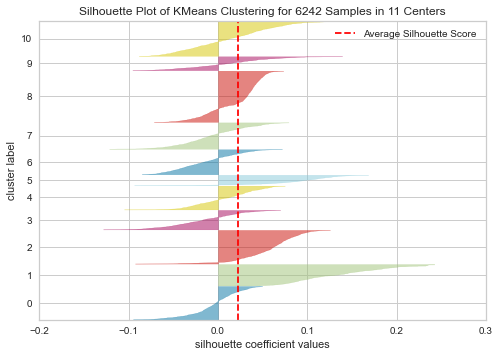

In [82]:
#silhouette method 
for i in range(2,12):
    model_sil2 = KMeans(i, random_state=42)
    visualizer_silhoutte = SilhouetteVisualizer(model_sil2, colors='yellowbrick')
    visualizer_silhoutte.fit(x_new)        
    visualizer_silhoutte.show() 

###### Optimal clustering by taking all data columns

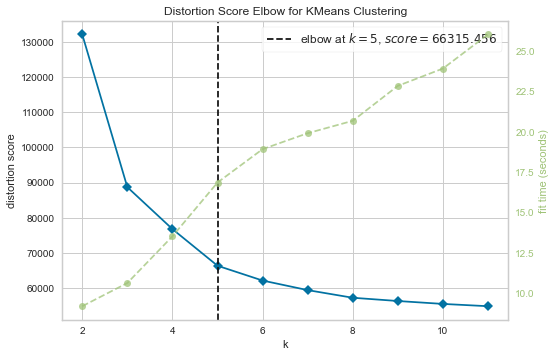

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
#elbow method 
model_elb3 = KMeans()
visualizer_elbow = KElbowVisualizer(model_elb3, k=(2,12))
visualizer_elbow.fit(df2)       
visualizer_elbow.show() 


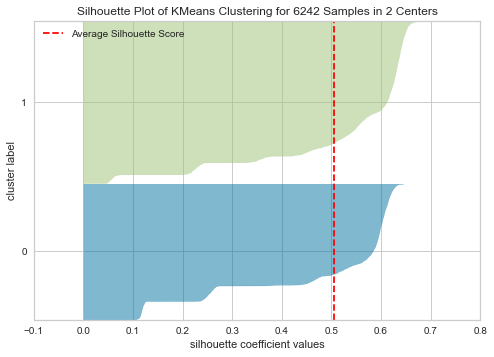

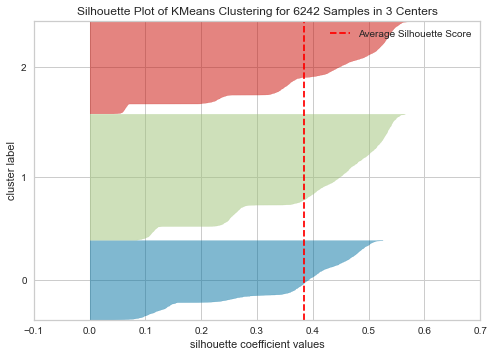

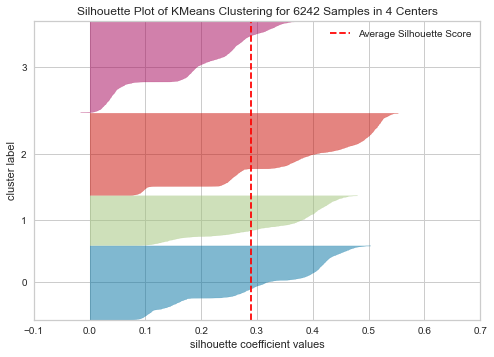

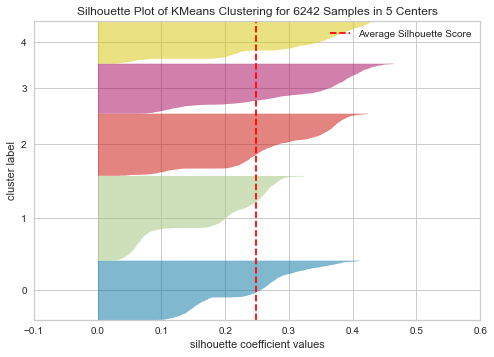

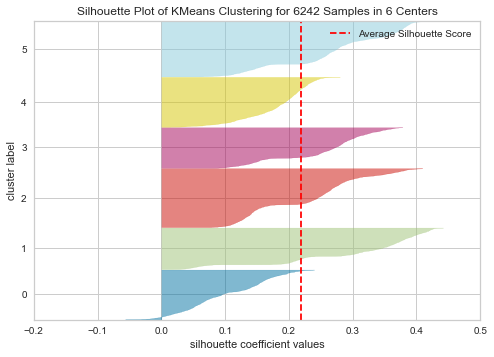

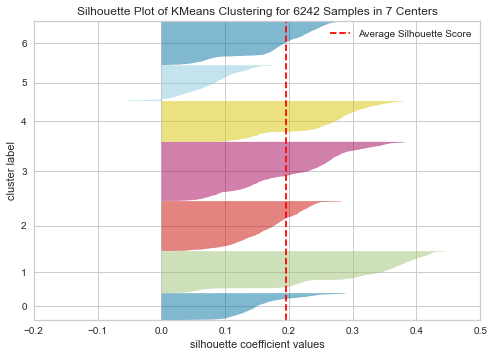

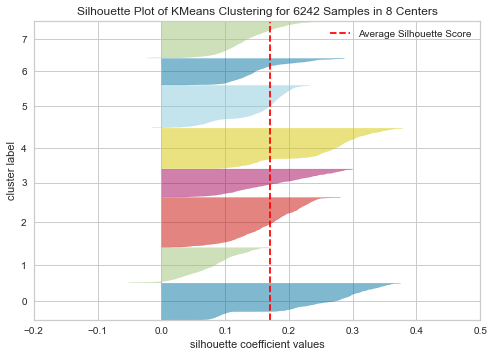

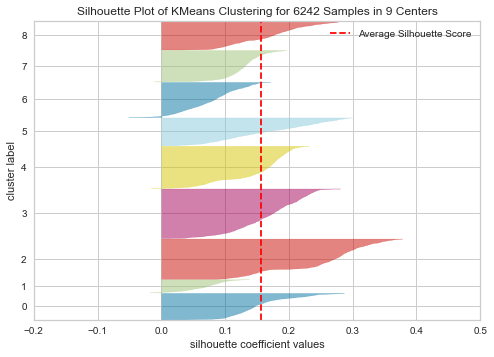

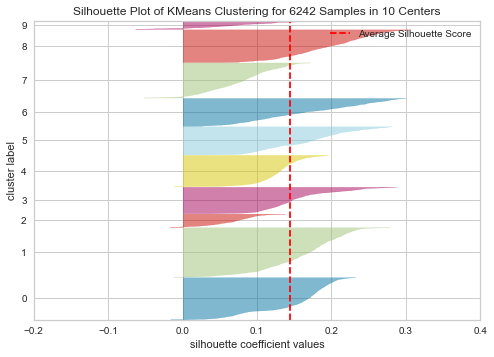

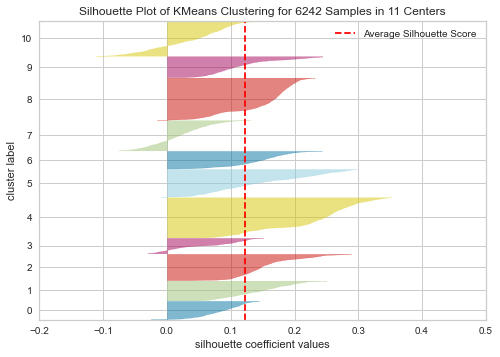

In [84]:
#silhouette method 
for i in range(2,12):
    model_sil3 = KMeans(i, random_state=42)
    visualizer_silhoutte = SilhouetteVisualizer(model_sil3, colors='yellowbrick')
    visualizer_silhoutte.fit(df2)        
    visualizer_silhoutte.show() 

###### When we use recipeNmae as target column we get K=5 using elbow method with clear elbow indication and K=5 using silhouette method with equal width clusters and silhouette score above average for all clusters.
Thus here we may be able to achieve optimal clustering with K=5

###### When we use cuisine as target column we get K=5 using elbow method with no clear elbow indication and K from 2 - 12 using silhouette method gives uneven width clusters and clusters with negative silhouette score.
Thus here we may not be able to achieve optimal clustering with any value of K

###### When we use all data columns we get K=5 using elbow method with clear elbow indication and K=5  using silhouette method gives equal width clusters and  silhouette score above average for all clusters
Thus here we may be able to achieve optimal clustering with K=5